In [ ]:
!pip install -U fastbook torchtext==0.8.1

  Using cached https://files.pythonhosted.org/packages/f2/ff/66f16fb9ceb45646e59a38ad5eb0f05fbd6524c20d9c4a2c922cdcd2955b/fastbook-0.0.16-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/13/80/046f0691b296e755ae884df3ca98033cb9afcaf287603b2b7999e94640b8/torchtext-0.8.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e8/79/e8a87e4c20238e114671314426227db8647d2b42744eab79e0917c59865e/fastai-2.3.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f5/99/e0808cb947ba10f575839c43e8fafc9cc44e4a7a2c8f79c60db48220a577/sentencepiece-0.1.95-cp37-cp37m-manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5c/c8/e2fba530b84a770373a106e4828ea83df62104b9694e367d169e07ea484f/nbdev-1.1.14-py3-none-any.whl
     |████████████████████████████████| 776.8MB 24kB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
ERROR: torchvision 0.9.1+c

In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import os
import json
import requests
import tarfile
from scipy.io import loadmat

In [ ]:
# Download all the data
path = Path('dog-breeds')
path_images = path/'stanford-dogs-images.tar'
path_lists = path/'stanford-dogs-lists.tar'
url_images = 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'
url_lists = 'http://vision.stanford.edu/aditya86/ImageNetDogs/lists.tar'

if not path.exists():
  path.mkdir(parents=true)
  
  # Get the images
  images_file = requests.get(url_images)
  open(path_images, 'wb').write(images_file.content)
  images_tar = tarfile.open(path_images)
  images_tar.extractall(path) # specify which folder to extract to
  images_tar.close()

  # Get the lists
  lists_file = requests.get(url_lists)
  open(path_lists, 'wb').write(lists_file.content)
  lists_tar = tarfile.open(path_lists)
  lists_tar.extractall(path) # specify which folder to extract to
  lists_tar.close()

In [ ]:
# Read in .mat files
train_list = loadmat(path/'train_list.mat')
train_list['file_list']

array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
      dtype=object)

In [ ]:
def get_breed_label(x):
  return Path(x).parent.name.split('-', 1)[-1]

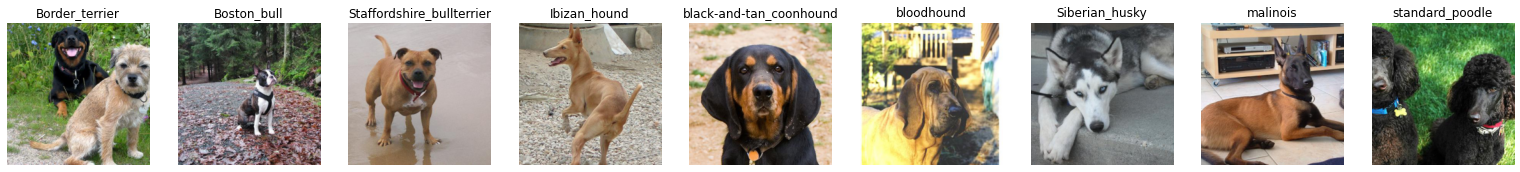

In [ ]:
# Create data loader
dls = ImageDataLoaders.from_path_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=get_breed_label, item_tfms=Resize(224))

dls.show_batch(max_n=9, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.781409,0.957930,0.288873,01:46


epoch,train_loss,valid_loss,error_rate,time
0,1.066684,0.715417,0.220360,01:51


In [ ]:
# Export the learner
learn.export(fname='dogbreed.pkl')

In [ ]:
import pickle

pickle.dump(learn, open('model.pkl', 'wb'))

In [ ]:
# Load the learner
learn_inf = load_learner(path/'dogbreed.pkl')

In [ ]:
def predict_breed(img_path):
  print(img_path)
  print(learn_inf.predict(img_path)[0].replace('_', ' '))
  img = Image.open(img_path)
  display(img.to_thumb(128,128))

/content/test_images/copper1.JPG


Chihuahua


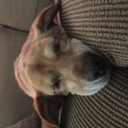

/content/test_images/teddy3.jpg


Shih-Tzu


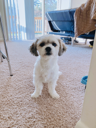

/content/test_images/teddy1.jpg


Shih-Tzu


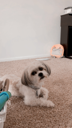

/content/test_images/teddy4.jpg


Lhasa


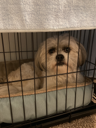

/content/test_images/teddy2.jpg


Maltese dog


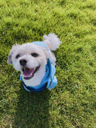

/content/test_images/teddy5.jpg


Lhasa


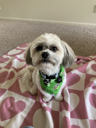

/content/test_images/copper2.jpg


Labrador retriever


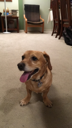

In [ ]:
# Run tests
test_image_path = Path('/content/test_images')
for img in test_image_path.ls(file_exts=['.jpg', '.JPG']):
  predict_breed(img)